# Project: Hospital Data Analysis

## Table of Contents
<ul>
  <li><a href="#introduction">Introduction</a></li>
  <li><a href="#wrangling">Data Wrangling</a></li>
  <li><a href="#eda">Exploratory Data Analysis</a></li>
  <li><a href="">Conclusion</a></li>
</ul>

<a id="introduction"></a>
## Introduction
> This analysis focuses on examining the **No-Show appointments** data from Kaggle. In the dataset, about 100,000 medical appointment records from Brazil have been featured. The information captured in the dataset include the patient's **id, Appointment Id, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show**
> ### Definition of important variables.
>> _Gender_: Describes whether the patient is **male** or **female**. <br>
>> _ScheduledDay_: Tells us on what day the patient set up their appointment. <br>
>> _Age_: Indicates the patients age. <br>
>> _Neighbourhood_: Indicates the location of the hospital. <br>
>> _Scholarship_: Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. <br>
>> _Hipertension_: Indicates whether a patient has Hipertension or not <br>
>> _Diabetes_: Indicates whether a patient is diabetic or not. <br>
>> _Alcoholism_: Indicates whether a patient alcoholic or not. <br>
>> _Handcap_: Indicates whether a patient is Handcapped or not. <br>
>> _SMS_received_: Indicates whether a patient received sms notifications about the appointment or not. <br>
>> _No-show_: Indicates whether a patient showed up for their appointment or not. <br>
>>> #### Important Points to Note:
>>>> 1. For the _Scholarship_, _Hipertension_, _Diabetes_, _Alcoholism_, _Handcap_, and _SMS_received_ fields, **1 = Yes** and **0 = No**
>>>> 2. For the _No-show_ field, **No = The patient showed up for the appointment** and **yes = The patient did not show up for the appointment**
> ### Questions to be answered.
>> Q1: Do patients of particular age groups book appointments more frequently than others? <br>
>> Q2: Are male patients more likely to show up for an appointment as compared to female patients? <br>
>> Q3: Are older patients more likely to show up for an appointment as compared to the younger patients? <br>
>> Q4: How do patients from different neighbourhoods differ in terms of showing up for doctor's appointments? <br>
>> Q5: Are patients who are enrolled in Brasilian welfare program more likely to show up for scheduled appointments? <br>
>> Q6: How do positive diagnosis of health conditions such as hipertension, Diabetes, Alcoholism, and Handcap affect appointment attendance? <br>

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id="wrangling"></a>
# Data Wrangling

## General Properties

In [2]:
# Loading the data and set the 'AppointmentID' as the index
df = pd.read_csv('Dataset/appointments_data.csv')

# Verify that the data was loaded successfully
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Examine the datatypes of the data in every column in the dataset
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

> All the numerical columns in the dataset are set as integers while the columns with text data are set to string as required.

In [4]:
# Examine the number of columns and rows in the data
df.shape

(110527, 14)

> The dataset has 14 columns and 110527 entries

In [5]:
# Check whether the data has any duplicated records
df.duplicated().sum()

0

> The dataset has no duplicated records

In [6]:
# check for records with null values.
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> There are no null values in the dataset.

In [7]:
# Check the number of unique appointments record by appointment id
df['AppointmentID'].nunique()

110527

> There are 110527 unique appoint records in the dataset

In [8]:
# How many unique patients are captured in the dataset?
df['PatientId'].nunique()

62299

> 62,299 unique patients have been captured in the dataset. <br>
> - This shows that some patients set more than one appointments.

In [9]:
# How many appointments were made by patients with hipertension in the dataset?
df['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

> Of all the appointments that were recorded, 21,810 appointments were made by patients who had hipertension.

In [10]:
# How many appointments were made by patients with Scholarship?
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

> Of all the appointments that were recorded, 10861 appointments were made by patients who had enrolled in Brasilian welfare program Bolsa Família.

### _**Remarks:**_ The dataset :-
> 1. Does not have any duplicated records. <br>
> 2. Has no null values. <br>
> 3. Has all the columns set to the correct datatypes <br>
**All the only data cleaning step that is needed is to drop the unnecessary columns**

## Data cleaning

In [11]:
# Make a copy of the original dataset
df_new = df.copy()

# Verify that the data was copied successfully
df_new.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [12]:
# Display all the columns for ease of reference
df_new.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

> We need to drop the `AppointmentDay` column.

In [13]:
# Drop the columns
df_new.drop(columns='AppointmentDay', axis=1, inplace=True)

# Verify that the columns were dropped successfully
df_new.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

### Set `AppointmentID` as the index column

In [14]:
df_new.set_index('AppointmentID', inplace=True)

# Confirm that the index was changed successfully
df_new.head(1)

,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Save the cleaned dataset in a new csv file.

In [15]:
df_new.to_csv('Dataset/clean_data.csv', index=True)

<a id = "eda"></a>
# Exploratory Data Analysis (EDA)

In [16]:
# Load the cleaned dataset.
df_clean = pd.read_csv('Dataset/clean_data.csv')

# Verify that the data was loaded successfully
df_clean.head(1)

,AppointmentID,PatientId,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,5642903,2.987250e+13,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


## Research Question 1: Do patients of particular age groups book appointments more frequently than others?

> To Respond to this question, we need to examine how the ages of the patients who booked appointments in all hospitals are distributed. To do this, we need to visualize the ages using a histogram 

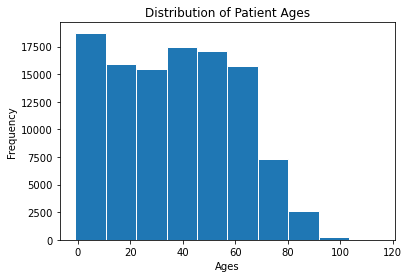

In [20]:
# Check the distribution of the ages of the patients
df_clean.Age.plot(kind= 'hist', edgecolor='white')
plt.title('Distribution of Patient Ages')
plt.xlabel('Ages')
plt.ylabel('Frequency');

> This does not give a clear picture of the distribution of the patient ages because as initially established, several patients made more than one appointment. To get a more accurate visualization, we need to plot the histogram using ages for the unique patients only.

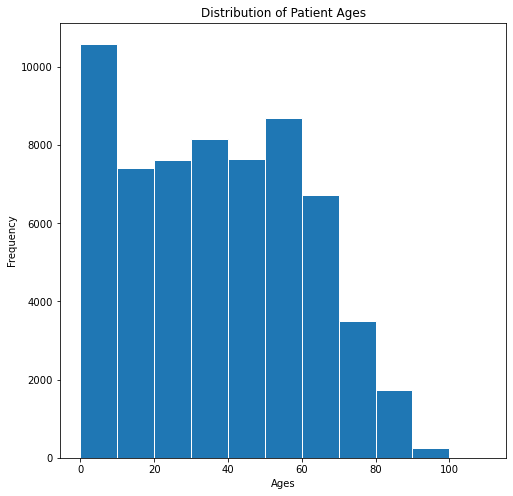

In [21]:
# Extract the data for the unique patients
unique_patients = df_clean.drop_duplicates(subset='PatientId', keep='first')

# Use the ages in this new dataset to examine the distribution of patient ages.
# unique_patients['Age'].plot(kind='hist')
ages = unique_patients['Age']
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
fig, ax = plt.subplots(figsize = (8,8))
ax.hist(ages, bins, edgecolor='white')
plt.title('Distribution of Patient Ages')
plt.xlabel('Ages')
plt.ylabel('Frequency');

### Question 1 Response:
> #### The above visualization reveal that patients aged between 0 to 10 years book a higher number of appointments as compared to the other age groups. The number of appointments booked by patients aged between 90 years and 100 years is disproportionately low as compared to the other age groups.

## Research Question 2: Are male patients more likely to show up for an appointment as compared to female patients?